# Task 3

# Aadesh Baral

Prediction using Decision Tree Algorithm (Level - Intermediate)

● For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it
graphically.

● The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

● Dataset : https://bit.ly/3kXTdox

● Sample Solution : https://bit.ly/2G6sYx9

● Task submission:
1. Host the code on GitHub Repository (public). Record the code and output in
a video. Post the video on YouTube
2. Share links of code (GitHub) and video (YouTube) as a post on YOUR LinkedIn
profile
3. Submit the LinkedIn link in Task Submission Form when shared with you.


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')

Data Analysis and encoding target variable for traning and testing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [5]:
def species_encoder(species):
    if species=='Iris-setosa':
        return 0
    if species=='Iris-versicolor':
        return 1
    if species=='Iris-virginica':
        return 2

In [6]:
df['Target']=df['Species'].apply(species_encoder)

In [7]:
df.drop('Species',axis=1,inplace=True)

In [8]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [9]:
X=df.drop(['Id','Target'],axis=1)
y=df['Target']

Splitting Traning and testing set.

In [10]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=101)

In [11]:
model=DecisionTreeClassifier(random_state=101)

In [12]:
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=101)

In [13]:
predictions=model.predict(X_test)

In [14]:
print(confusion_matrix(y_test,predictions))
print('The accuracy of model is {}'.format(accuracy_score(y_test,predictions)))

[[13  0  0]
 [ 0 19  1]
 [ 0  1 11]]
The accuracy of model is 0.9555555555555556


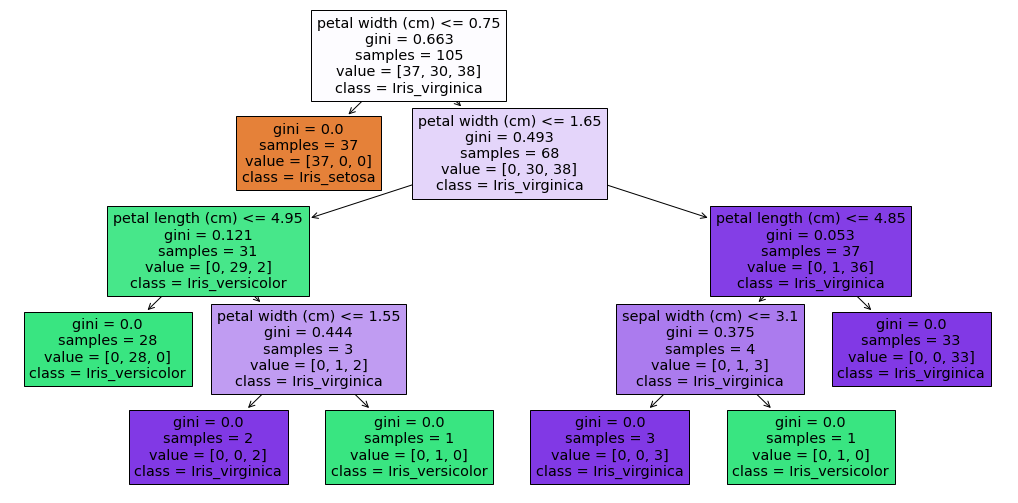

In [15]:
plt.figure(figsize=(18,9))
Features=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
species=['Iris_setosa', 'Iris_versicolor', 'Iris_virginica']
tree.plot_tree(model,
               feature_names = Features, 
               class_names=species,
               filled = True);